# Гарапко Даниил, группа 858641

# Лабораторная работа №6 “Кластеризация”

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.io import loadmat
from scipy.spatial import distance
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random
from PIL import Image

## Task 1

Набор данных ex6data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X<sub>1</sub> и X<sub>2</sub> - координаты точек, которые необходимо кластеризовать.


1. Загрузите данные ex6data1.mat из файла.

In [0]:
task1_file_name = "Data\Lab 6\ex6data1.mat"
mat = loadmat(task1_file_name)  # load mat-file
X = mat['X']

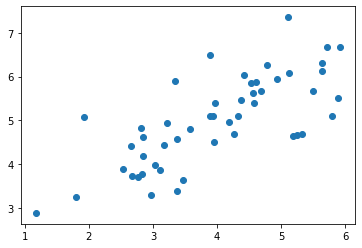

In [0]:
plt.scatter(X[:, 0], X[:, 1], cmap='winter')
plt.show()

2. Реализуйте функцию случайной инициализации K центров кластеров.

In [0]:
def random_initialize_K_clusters(X, k):
    m, n = X.shape
    positions = random.sample(range(m), k)
    result = np.zeros((m, 2))
    result = [X[position, :] for position in positions]
    return np.array(result)

3. Реализуйте функцию определения принадлежности к кластерам.

In [0]:
def determ_cluster(X, nu):
    m, n = X.shape
    cluster = np.zeros((m, 1), dtype=int)
    for i in range(m):
        min_distance, num_cluster = 1e10, -1
        for j in range(len(nu)):
            dst = distance.euclidean(X[i, :], nu[j, :])
            if dst < min_distance:
                min_distance, num_cluster = dst, j
        cluster[i, 0] = num_cluster
    return cluster

4. Реализуйте функцию пересчета центров кластеров.

In [0]:
def recalculate_cluster_center(X, cluster, nu):
    for k in range(len(nu)):
        indices = [i for i,id in enumerate(cluster) if id == k]
        nu[k] = np.mean(X[indices], axis=0)
    return nu

5. Реализуйте алгоритм K-средних.

In [0]:
def k_means_algorithm(X, nu, step=5, is_print=False):
    for i in range(step):
        nu_old = np.copy(nu)
        cluster = determ_cluster(X, nu)
        if is_print:
            plt.scatter(X[:, 0], X[:, 1], c=cluster[:,0], cmap='winter')
            plt.plot(nu[:, 0], nu[:, 1], 'o', color='black')
            plt.show()
        nu = recalculate_cluster_center(X, cluster, nu)
        if not np.all(np.abs(nu_old-nu)):
            break
    cluster = determ_cluster(X, nu)
    return cluster, nu

6. Постройте график, на котором данные разделены на K=3 кластеров
(при помощи различных маркеров или цветов), а также траекторию
движения центров кластеров в процессе работы алгоритма

In [0]:
nu = random_initialize_K_clusters(X, 3)

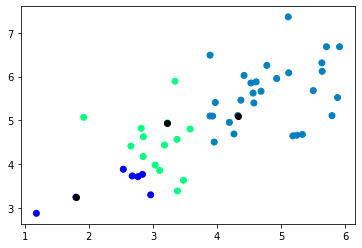

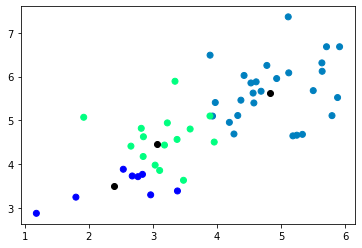

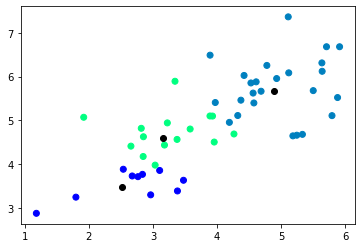

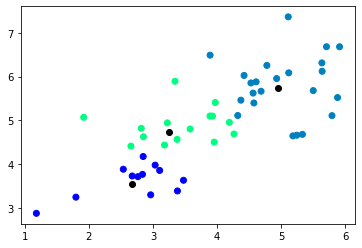

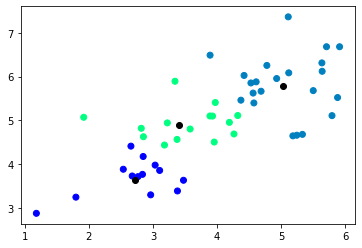

In [0]:
cluster, nu = k_means_algorithm(X, nu, is_print=True)

## Task 2

Набор данных bird_small.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит массив размером (16384, 3) -
изображение 128x128 в формате RGB.

7. Загрузите данные bird_small.mat из файла.

In [0]:
task2_file_name = r"Data\Lab 6\bird_small.mat"
mat = loadmat(task2_file_name)  # load mat-file
A = mat['A']

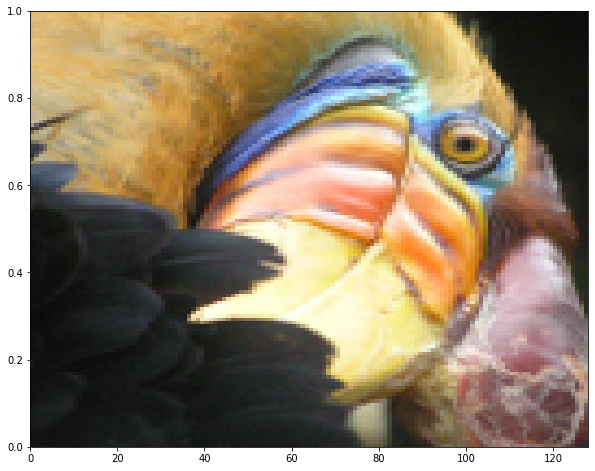

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(A,extent=[0,128,0,1], aspect=100)
plt.show()

8. С помощью алгоритма K-средних используйте 16 цветов для
кодирования пикселей.

In [0]:
def quantize_own(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    nu = random_initialize_K_clusters(reshaped_raster, 16)
    cluster, nu = k_means_algorithm(reshaped_raster, nu)

    quantized_raster = np.reshape(nu[cluster], (width, height, nu.shape[1]))

    return quantized_raster

9. Насколько уменьшился размер изображения? Как это сказалось на
качестве?

До сжатия картинка весила 63КБ, после 22КБ

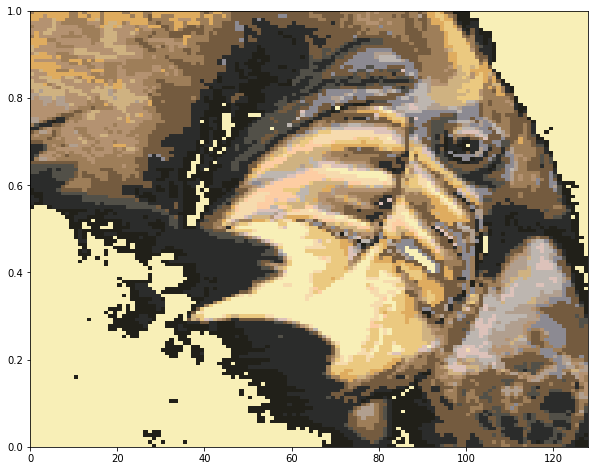

In [0]:
fig, ax = plt.subplots(figsize=(10, 20))
plt.imshow(quantize_own(A, 16),extent=[0,128,0,1], aspect=100)
plt.show()

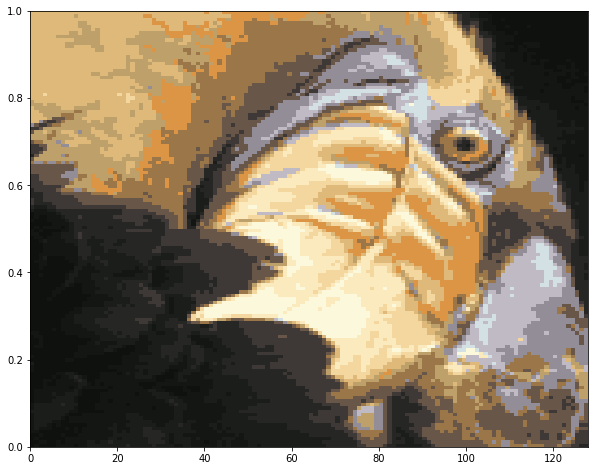

In [0]:
fig, ax = plt.subplots(figsize=(10, 20))
plt.imshow(quantize_own(A/255, 16),extent=[0,128,0,1], aspect=100)
plt.show()

In [0]:
array = quantize_own(A, 16)
tmp = Image.fromarray(array)
print(tmp.size) # (28, 100)

(128, 128)


10.Реализуйте алгоритм K-средних на другом изображении.

In [0]:
luntik_file_name = r"Data\Lab 6\Luntik.jpg"

In [0]:
img = Image.open(luntik_file_name)
luntik_arr = np.array(img)

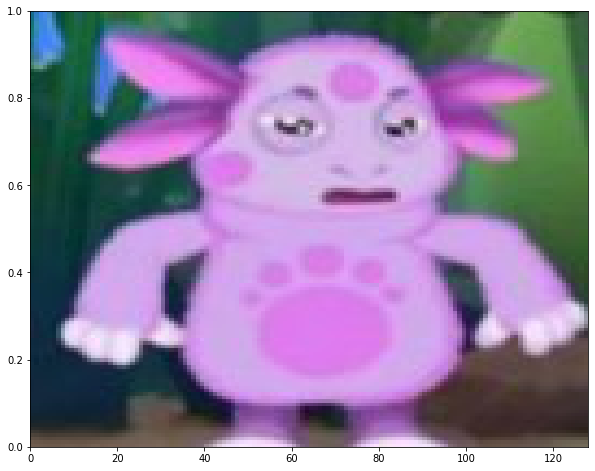

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(luntik_arr,extent=[0,128,0,1], aspect=100)
plt.show()

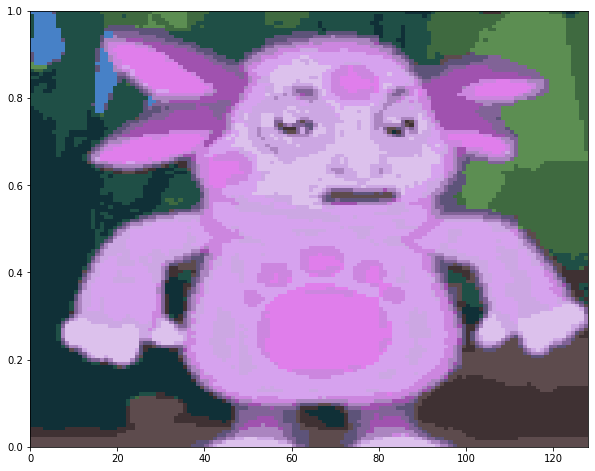

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(quantize_own(luntik_arr/255, 16),extent=[0,128,0,1], aspect=100)
plt.show()

До сжатия картинка весила 55КБ, после 17КБ

11.Реализуйте алгоритм иерархической кластеризации на том же
изображении. Сравните полученные результаты.

In [0]:
def quantize_by_hierarhy(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = AgglomerativeClustering(n_clusters=n_colors) 
    labels = model.fit_predict(reshaped_raster)
    palette = shuffle(reshaped_raster)[:n_colors]    

    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

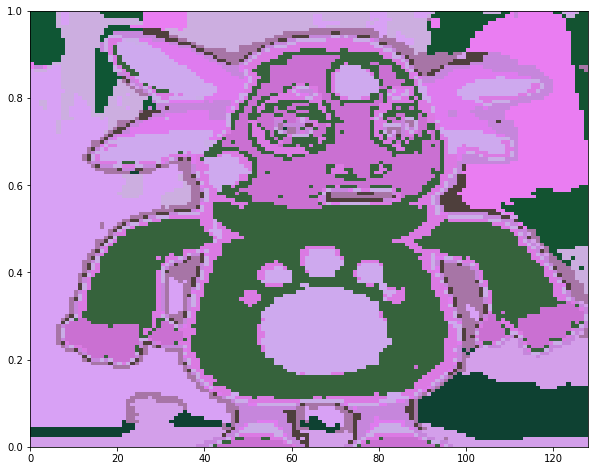

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(quantize_by_hierarhy(luntik_arr/255, 16),extent=[0,128,0,1], aspect=100)
plt.show()